# Tarea 1
## Definicion de los metodos de interpolacion

- Interpolación del vecino más cercano

In [1]:
%matplotlib inline
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import numpy as np 
import math as m
import imutils

import timeit as tm
import cv2
import pandas as pd

In [2]:
#Definición de interpolación

def interpolationVC(img,dstH,dstW): #recibe imagen original, altura y ancho deseado en enteros
    scrH,scrW=img.shape
    retimg=np.zeros((dstH,dstW,3),dtype=np.uint8)
    for i in range(dstH-1):
        for j in range(dstW-1):
            scrx=round(i*(scrH/dstH))
            scry=round(j*(scrW/dstW))
            retimg[i,j]=img[scrx,scry]
    return retimg


In [3]:

#Obtención de imagen a arreglo
im_path='UNPrueba.jpg'
image=np.array(Image.open(im_path))


In [4]:
#Uso de función de interpolacion e impresión de imagen
image1=interpolationVC(image,image.shape[0]*2,image.shape[1]*2)
image1=Image.fromarray(image1.astype('uint8')).convert('RGB')



(<AxesSubplot:title={'center':'Imagen Aumentada'}>,
 Text(0.5, 1.0, 'Imagen Aumentada'))

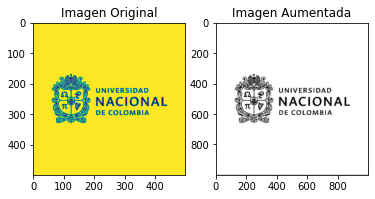

In [5]:
plt.figure(1)
plt.subplot(121), plt.imshow(image), plt.title('Imagen Original')
plt.subplot(122), plt.imshow(image1), plt.title('Imagen Aumentada')


In [6]:
#Visualización en ventanas emergentes
image1=np.array(image1)
cv2.imshow('Imagen Original', image)
cv2.imshow('Imagen aumentada', image1)
cv2.waitKey(0)
cv2.destroyAllWindows()

* Interpolacion bilineal

In [7]:

def BiLinear_interpolation(img,dstH,dstW):
    scrH,scrW=img.shape
    img=np.pad(img,((0,1),(0,1)),'constant')
    retimg=np.zeros((dstH,dstW,3),dtype=np.uint8)
    for i in range(dstH):
        for j in range(dstW):
            scrx=(i+1)*(scrH/dstH)-1
            scry=(j+1)*(scrW/dstW)-1
            x=m.floor(scrx)
            y=m.floor(scry)
            u=scrx-x
            v=scry-y
            retimg[i,j]=(1-u)*(1-v)*img[x,y]+u*(1-v)*img[x+1,y]+(1-u)*v*img[x,y+1]+u*v*img[x+1,y+1]
    return retimg


(<AxesSubplot:title={'center':'Imagen Aumentada'}>,
 Text(0.5, 1.0, 'Imagen Aumentada'))

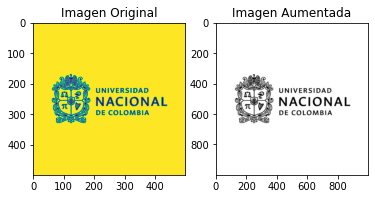

In [8]:
#Uso de función de interpolacion e impresión de imagen
image2=BiLinear_interpolation(image,image.shape[0]*2,image.shape[1]*2)
image2=Image.fromarray(image2.astype('uint8')).convert('RGB')
plt.figure(2)
plt.subplot(121), plt.imshow(image), plt.title('Imagen Original')
plt.subplot(122), plt.imshow(image2), plt.title('Imagen Aumentada')


In [9]:
#Visualización en ventanas emergentes
image2=np.array(image2)
cv2.imshow('Imagen Original',image)
cv2.imshow('Imagen aumentada',image2)
cv2.waitKey(0)
cv2.destroyAllWindows()

* Interpolación bicubica

In [10]:
# Interpolation kernel
def u(s, a):
    
    if (abs(s) >= 0) & (abs(s) <= 1):
        return (a+2)*(abs(s)**3)-(a+3)*(abs(s)**2)+1
        
    elif (abs(s) > 1) & (abs(s) <= 2):
        return a*(abs(s)**3)-(5*a)*(abs(s)**2)+(8*a)*abs(s)-4*a
    return 0


In [11]:

def padding(img, H, W, C):
    zimg = np.zeros((H+4, W+4, C))
    zimg[2:H+2, 2:W+2, :C] = img
      
    # Pad the first/last two col and row
    zimg[2:H+2, 0:2, :C] = img[:, 0:1, :C]
    zimg[H+2:H+4, 2:W+2, :] = img[H-1:H, :, :]
    zimg[2:H+2, W+2:W+4, :] = img[:, W-1:W, :]
    zimg[0:2, 2:W+2, :C] = img[0:1, :, :C]
      
    # Pad the missing eight points
    zimg[0:2, 0:2, :C] = img[0, 0, :C]
    zimg[H+2:H+4, 0:2, :C] = img[H-1, 0, :C]
    zimg[H+2:H+4, W+2:W+4, :C] = img[H-1, W-1, :C]
    zimg[0:2, W+2:W+4, :C] = img[0, W-1, :C]
      
    return zimg


In [12]:
# Bicubic operation
def bicubic(img, ratio, a):
  
    # Get image size
    H, W, C = img.shape
  
    # Here H = Height, W = weight,
    # C = Number of channels if the
    # image is coloured.
    img = padding(img, H, W, C)
  
    # Create new image
    dH = m.floor(H*ratio)
    dW = m.floor(W*ratio)
  
    # Converting into matrix
    dst = np.zeros((dH, dW, 3))
  
    # np.zeroes generates a matrix
    # consisting only of zeroes
    # Here we initialize our answer
    # (dst) as zero
  
    h = 1/ratio
  
    print('Start bicubic interpolation')
    print('It will take a little while...')
    inc = 0
  
    for c in range(C):
        for j in range(dH):
            for i in range(dW):
  
                # Getting the coordinates of the
                # nearby values
                x, y = i * h + 2, j * h + 2
  
                x1 = 1 + x - m.floor(x)
                x2 = x - m.floor(x)
                x3 = m.floor(x) + 1 - x
                x4 = m.floor(x) + 2 - x
  
                y1 = 1 + y - m.floor(y)
                y2 = y - m.floor(y)
                y3 = m.floor(y) + 1 - y
                y4 = m.floor(y) + 2 - y
  
                # Considering all nearby 16 values
                mat_l = np.matrix([[u(x1, a), u(x2, a), u(x3, a), u(x4, a)]])
                mat_m = np.matrix([[img[int(y-y1), int(x-x1), c],
                                    img[int(y-y2), int(x-x1), c],
                                    img[int(y+y3), int(x-x1), c],
                                    img[int(y+y4), int(x-x1), c]],
                                   [img[int(y-y1), int(x-x2), c],
                                    img[int(y-y2), int(x-x2), c],
                                    img[int(y+y3), int(x-x2), c],
                                    img[int(y+y4), int(x-x2), c]],
                                   [img[int(y-y1), int(x+x3), c],
                                    img[int(y-y2), int(x+x3), c],
                                    img[int(y+y3), int(x+x3), c],
                                    img[int(y+y4), int(x+x3), c]],
                                   [img[int(y-y1), int(x+x4), c],
                                    img[int(y-y2), int(x+x4), c],
                                    img[int(y+y3), int(x+x4), c],
                                    img[int(y+y4), int(x+x4), c]]])
                mat_r = np.matrix(
                    [[u(y1, a)], [u(y2, a)], [u(y3, a)], [u(y4, a)]])
                  
                # Here the dot function is used to get the dot 
                # product of 2 matrices
                dst[j, i, c] = np.dot(np.dot(mat_l, mat_m), mat_r)
  
    # If there is an error message, it
    # directly goes to stderr
    sys.stderr.write('\n')
      
    # Flushing the buffer
    sys.stderr.flush()
    return dst

In [13]:
# Read image
# You can put your input image over here 
# to run bicubic interpolation
# The read function of Open CV is used 
# for this task
img = cv2.imread('UNPrueba.jpg')
  
# Scale factor
ratio = 2
  
# Coefficient
a = -1/2
  
# Passing the input image in the 
# bicubic function
dst = bicubic(img, ratio, a)  
print('Completed!')
  
# Saving the output image
cv2.imwrite('bicubic.png', dst) 
bicubicImg=cv2.imread('bicubic.png')

Start bicubic interpolation
It will take a little while...


Completed!


(<AxesSubplot:title={'center':'Imagen aumentada'}>,
 Text(0.5, 1.0, 'Imagen aumentada'))

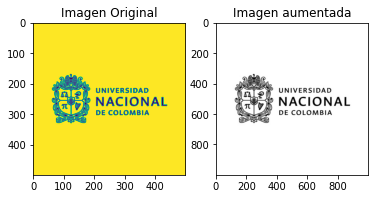

In [14]:
# display shapes of both images
plt.figure(3)
plt.subplot(121), plt.imshow(image), plt.title('Imagen Original')
plt.subplot(122), plt.imshow(bicubicImg), plt.title('Imagen aumentada')

In [15]:
#Impresion en ventanas independientes
cv2.imshow('Imagen original',image)
cv2.imshow('Imagen aumentada',bicubicImg)
cv2.waitKey(0)
cv2.destroyAllWindows()

## Definición de función para rotar imagen

In [16]:
#rotación con librerias
def RotacionLibr(img, angle):
    rotada=imutils.rotate(img, angle)
    return rotada

#rotacion sin librerias
def RotacionSin(image, angle, fill=0):
    theta = angle*m.pi/180
    # Rotation matrix
    matrix = np.array([[m.cos(theta), -m.sin(theta)], [m.sin(theta), m.cos(theta)]])
    # Creating rotated image
    h = ( int(m.sqrt(image.shape[0]**2 + image.shape[1]**2)) // 2 ) * 2 + 4
    img_rot = np.ones((h,h), np.uint8) * 255 if fill==1 else np.zeros((h,h), np.uint8)
    cx = int(img_rot.shape[0]/2)
    cy = int(img_rot.shape[1]/2)
    # Rotation points
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            vx = - image.shape[0]/2 + i
            vy = - image.shape[1]/2 + j
            vector = np.array([[vx],[vy]])
            rotated_vector = matrix.dot(vector)
            rvx = cx + int(rotated_vector[0,0])
            rvy = cy + int(rotated_vector[1,0])
            img_rot[rvx,rvy] = image[i,j]
    return img_rot

(<AxesSubplot:title={'center':'Imagen Rotada'}>,
 Text(0.5, 1.0, 'Imagen Rotada'))

<Figure size 1080x1080 with 0 Axes>

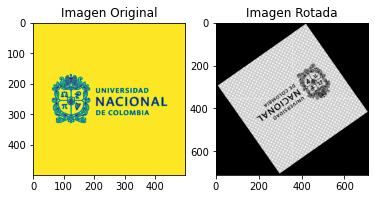

In [17]:
plt.figure(figsize=(15,15))
rotated=RotacionSin(image, 180, 0)
plt.figure(4)
plt.subplot(121), plt.imshow(image), plt.title('Imagen Original')
plt.subplot(122), plt.imshow(RotacionSin(image, 215, 0), cmap='gray'), plt.title('Imagen Rotada')

#La impresión se visualiza mejor en ventanas independientes.

In [18]:
#Impresion en ventanas independientes
cv2.imshow('Imagen',image)
cv2.imshow('Rotado',rotated)
cv2.waitKey(0)
cv2.destroyAllWindows()